# 1. Import Libraries

In [5]:
import tensorflow as tf
gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

In [4]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import  MinMaxScaler, PowerTransformer, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    GradientBoostingClassifier, 
    AdaBoostClassifier, 
    RandomForestClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier

# 2. Load Data

In [6]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

# 3. Initial Analysis

### 3.1. Metadata

In [ ]:
data.info()

In [19]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,317.0,58.725552,12.827374,29.00000,49.00000,58.000000,67.00000,90.0000
Protein1,317.0,-0.027232,0.543858,-2.14460,-0.35060,0.005649,0.33626,1.5936
Protein2,317.0,0.949557,0.906153,-0.97873,0.36884,0.997130,1.61200,3.4022
Protein3,317.0,-0.095104,0.589027,-1.62740,-0.53136,-0.193040,0.25121,2.1934
Protein4,317.0,0.006713,0.625965,-2.02550,-0.38224,0.038522,0.43625,1.6299


In [20]:
print(f'Columns Names - Unique Values - Columns Dtypes')
print(f'==============================================')
for idx, columns in enumerate(data.columns):
    print(f'{idx}. {columns} - {len(data[columns].unique())} - {data[columns].dtype}')

Columns Names - Unique Values - Columns Dtypes
0. Age - 57 - float64
1. Gender - 2 - object
2. Protein1 - 316 - float64
3. Protein2 - 317 - float64
4. Protein3 - 317 - float64
5. Protein4 - 316 - float64
6. Tumour_Stage - 3 - object
7. Histology - 3 - object
8. ER status - 1 - object
9. PR status - 1 - object
10. HER2 status - 2 - object
11. Surgery_type - 4 - object
12. Patient_Status - 2 - object


In [21]:
data.isnull().sum()

Age               0
Gender            0
Protein1          0
Protein2          0
Protein3          0
Protein4          0
Tumour_Stage      0
Histology         0
ER status         0
PR status         0
HER2 status       0
Surgery_type      0
Patient_Status    0
dtype: int64

In [22]:
data.duplicated().sum()

0

### 3.2. Process Columns

In [34]:
label_names = data["target_names"]
labels = data["target"]
feature_names = data["feature_names"]
features = data["data"]

print(label_names)
print("Class label :", set(labels))
print(feature_names)
print(features[0], "\n")

['malignant' 'benign']
Class label : {0, 1}
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 



In [ ]:
# def object_to_numeric(data):
#     le = LabelEncoder()

#     data['Gender'] = le.fit_transform(data['Gender'])
#     data['Tumour_Stage'] = le.fit_transform(data['Tumour_Stage'])
#     data['Histology'] = le.fit_transform(data['Histology'])
#     data['ER status'] = le.fit_transform(data['ER status'])
#     data['PR status'] = le.fit_transform(data['PR status'])
#     data['HER2 status'] = le.fit_transform(data['HER2 status'])
#     data['Surgery_type'] = le.fit_transform(data['Surgery_type'])
#     data['Patient_Status'] = le.fit_transform(data['Patient_Status'])
#     return data

# data = object_to_numeric(data)
# data

In [ ]:
# def change_dtypes(data):
#     data['Age'] = data['Age'].astype('int8')
#     data['Protein1'] = data['Protein1'].astype('float16')
#     data['Protein2'] = data['Protein2'].astype('float16')
#     data['Protein3'] = data['Protein3'].astype('float16')
#     data['Protein4'] = data['Protein4'].astype('float16')
#     return data

# data = change_dtypes(data)
# data

In [ ]:
# numerical_dtypes = ['int8', 'int16', 'int32', 'int64', 'float8', 'float16', 'float32', 'float64']

# numerical_columns = [column_name for column_name in data.columns if data[column_name].dtype in numerical_dtypes]
# categorical_columns = [column_name for column_name in data.columns if data[column_name].dtype == 'object' or data[column_name].dtype == 'category']
# print(f'Numerical Columns   :{numerical_columns}')
# print(f'Categorical Columns :{categorical_columns}')

### 3.3. EDA

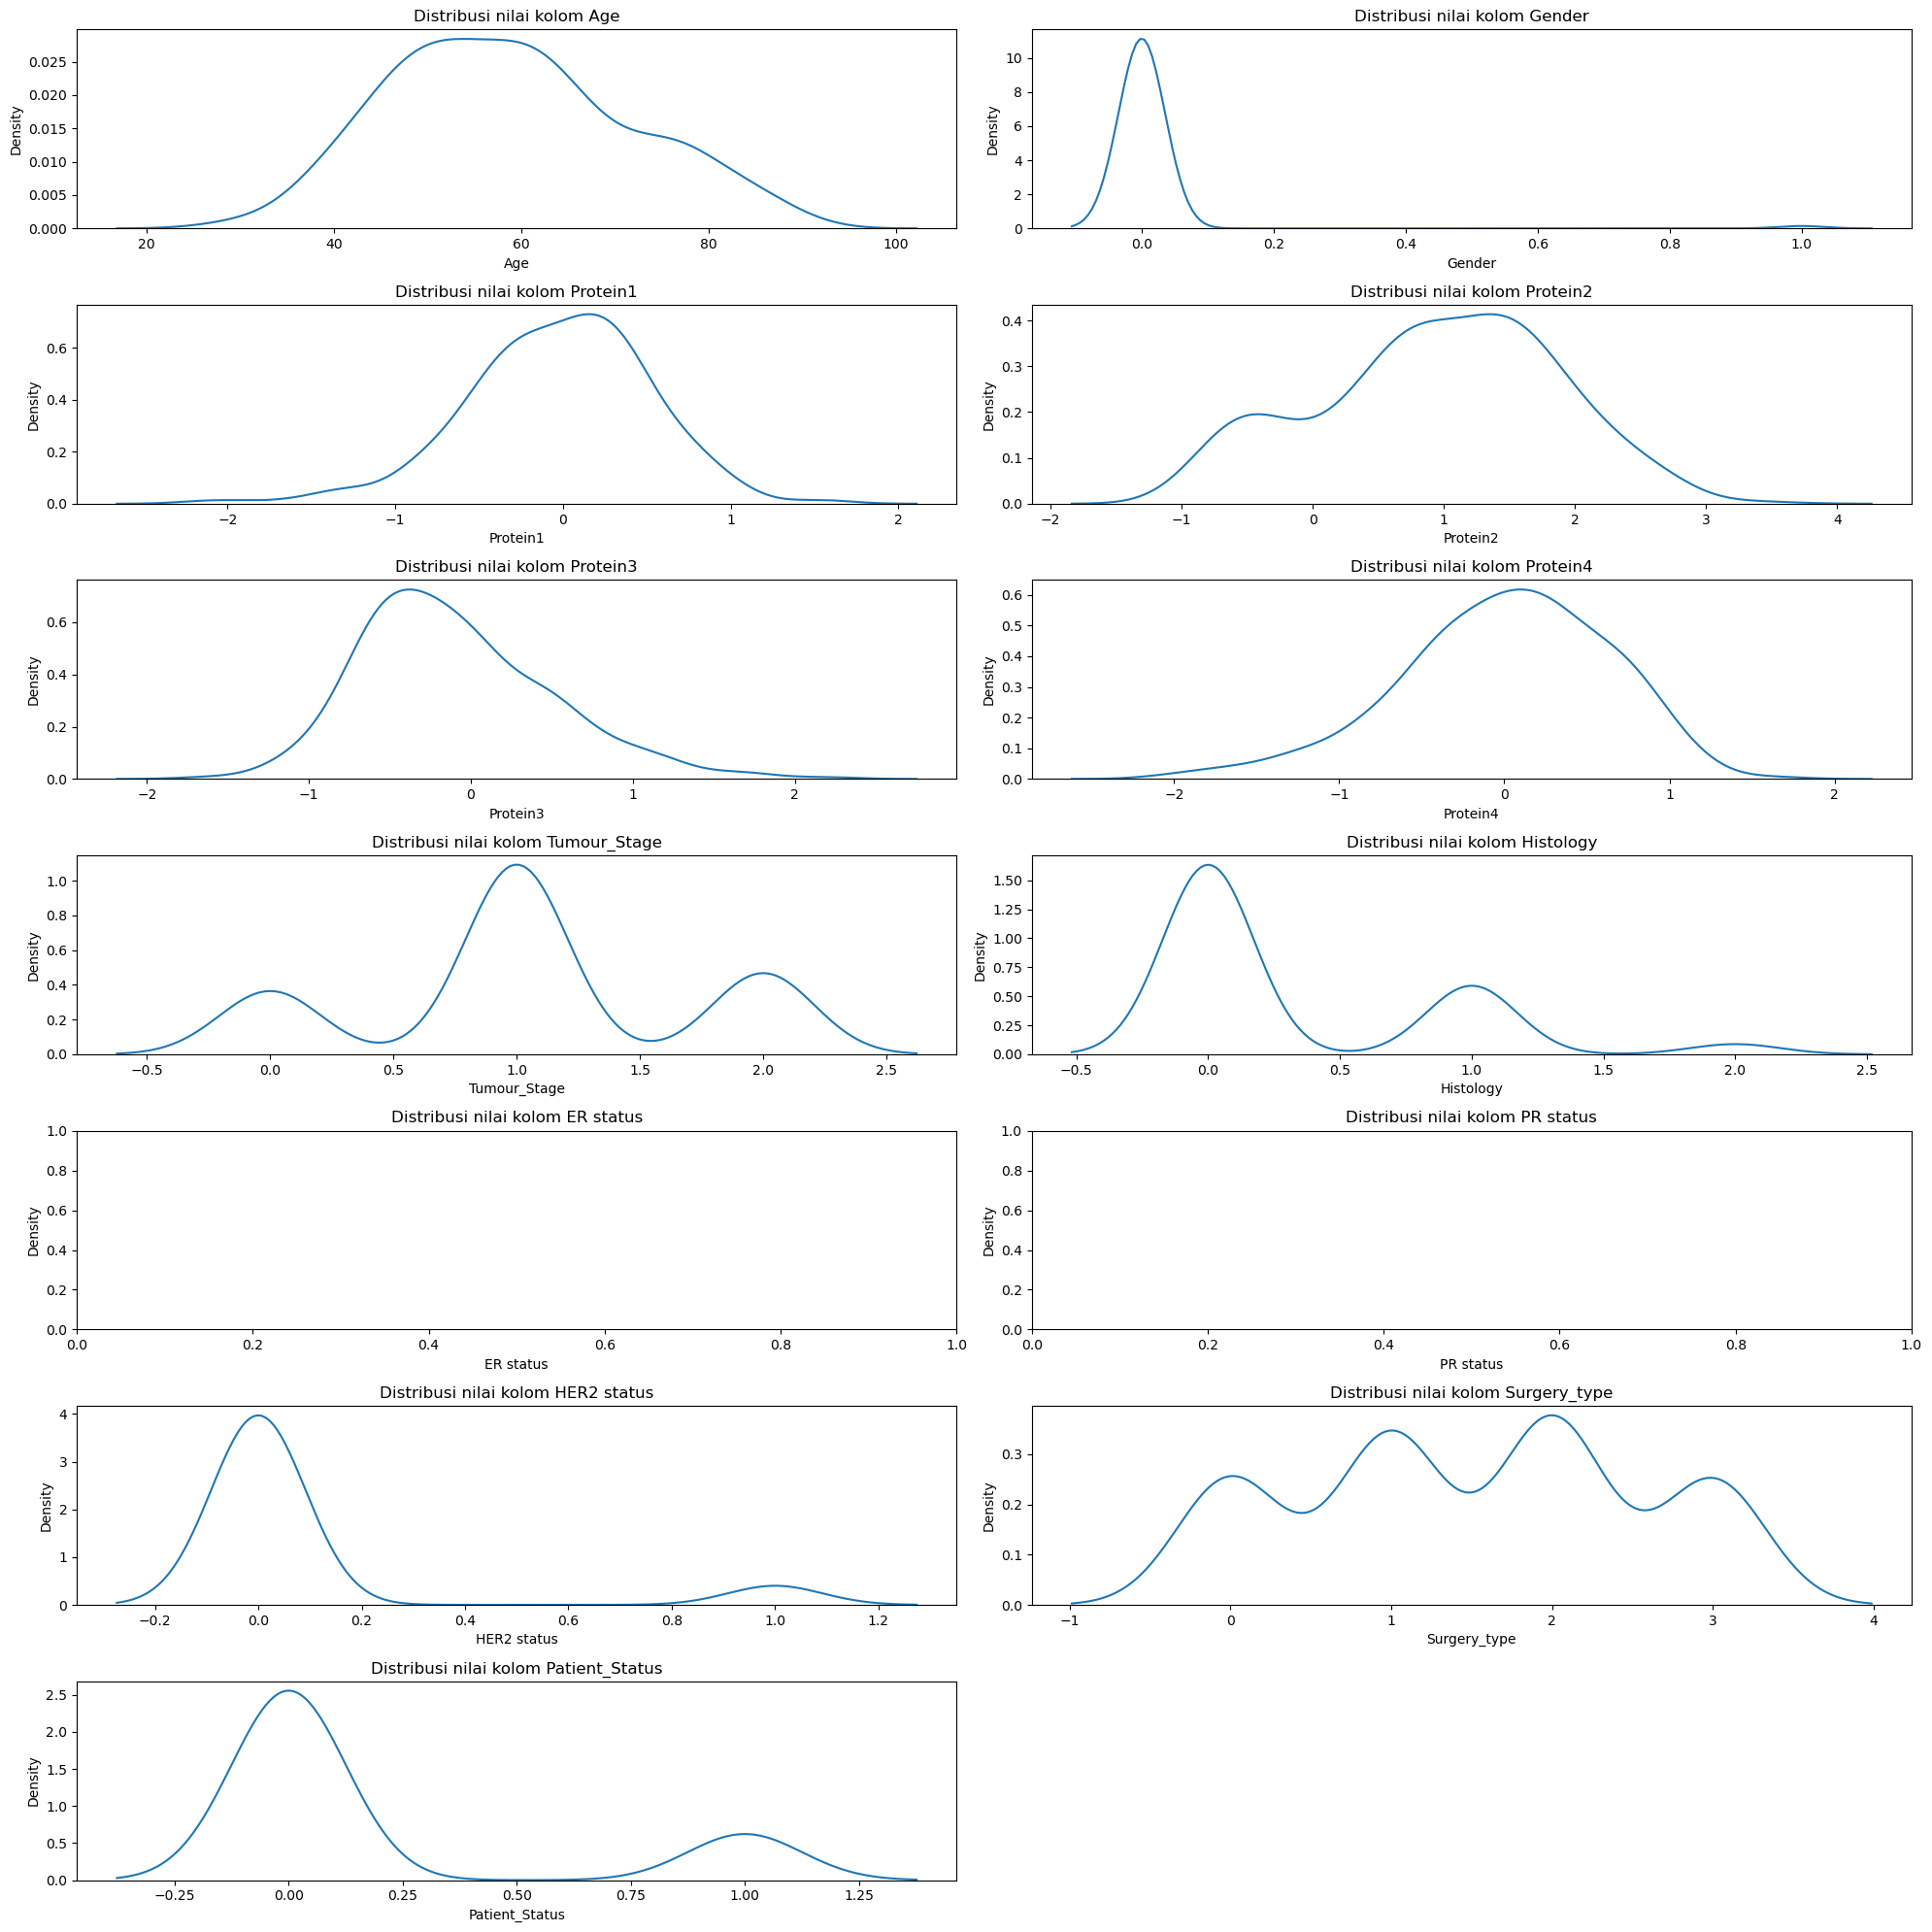

In [51]:
num_cols = 2
num_rows = math.ceil(len(numerical_columns) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.kdeplot(data = data, x = column, ax=axes[row, col], warn_singular=False) \
        .set_title("Distribusi nilai kolom " + column)
    

for i in range(len(numerical_columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

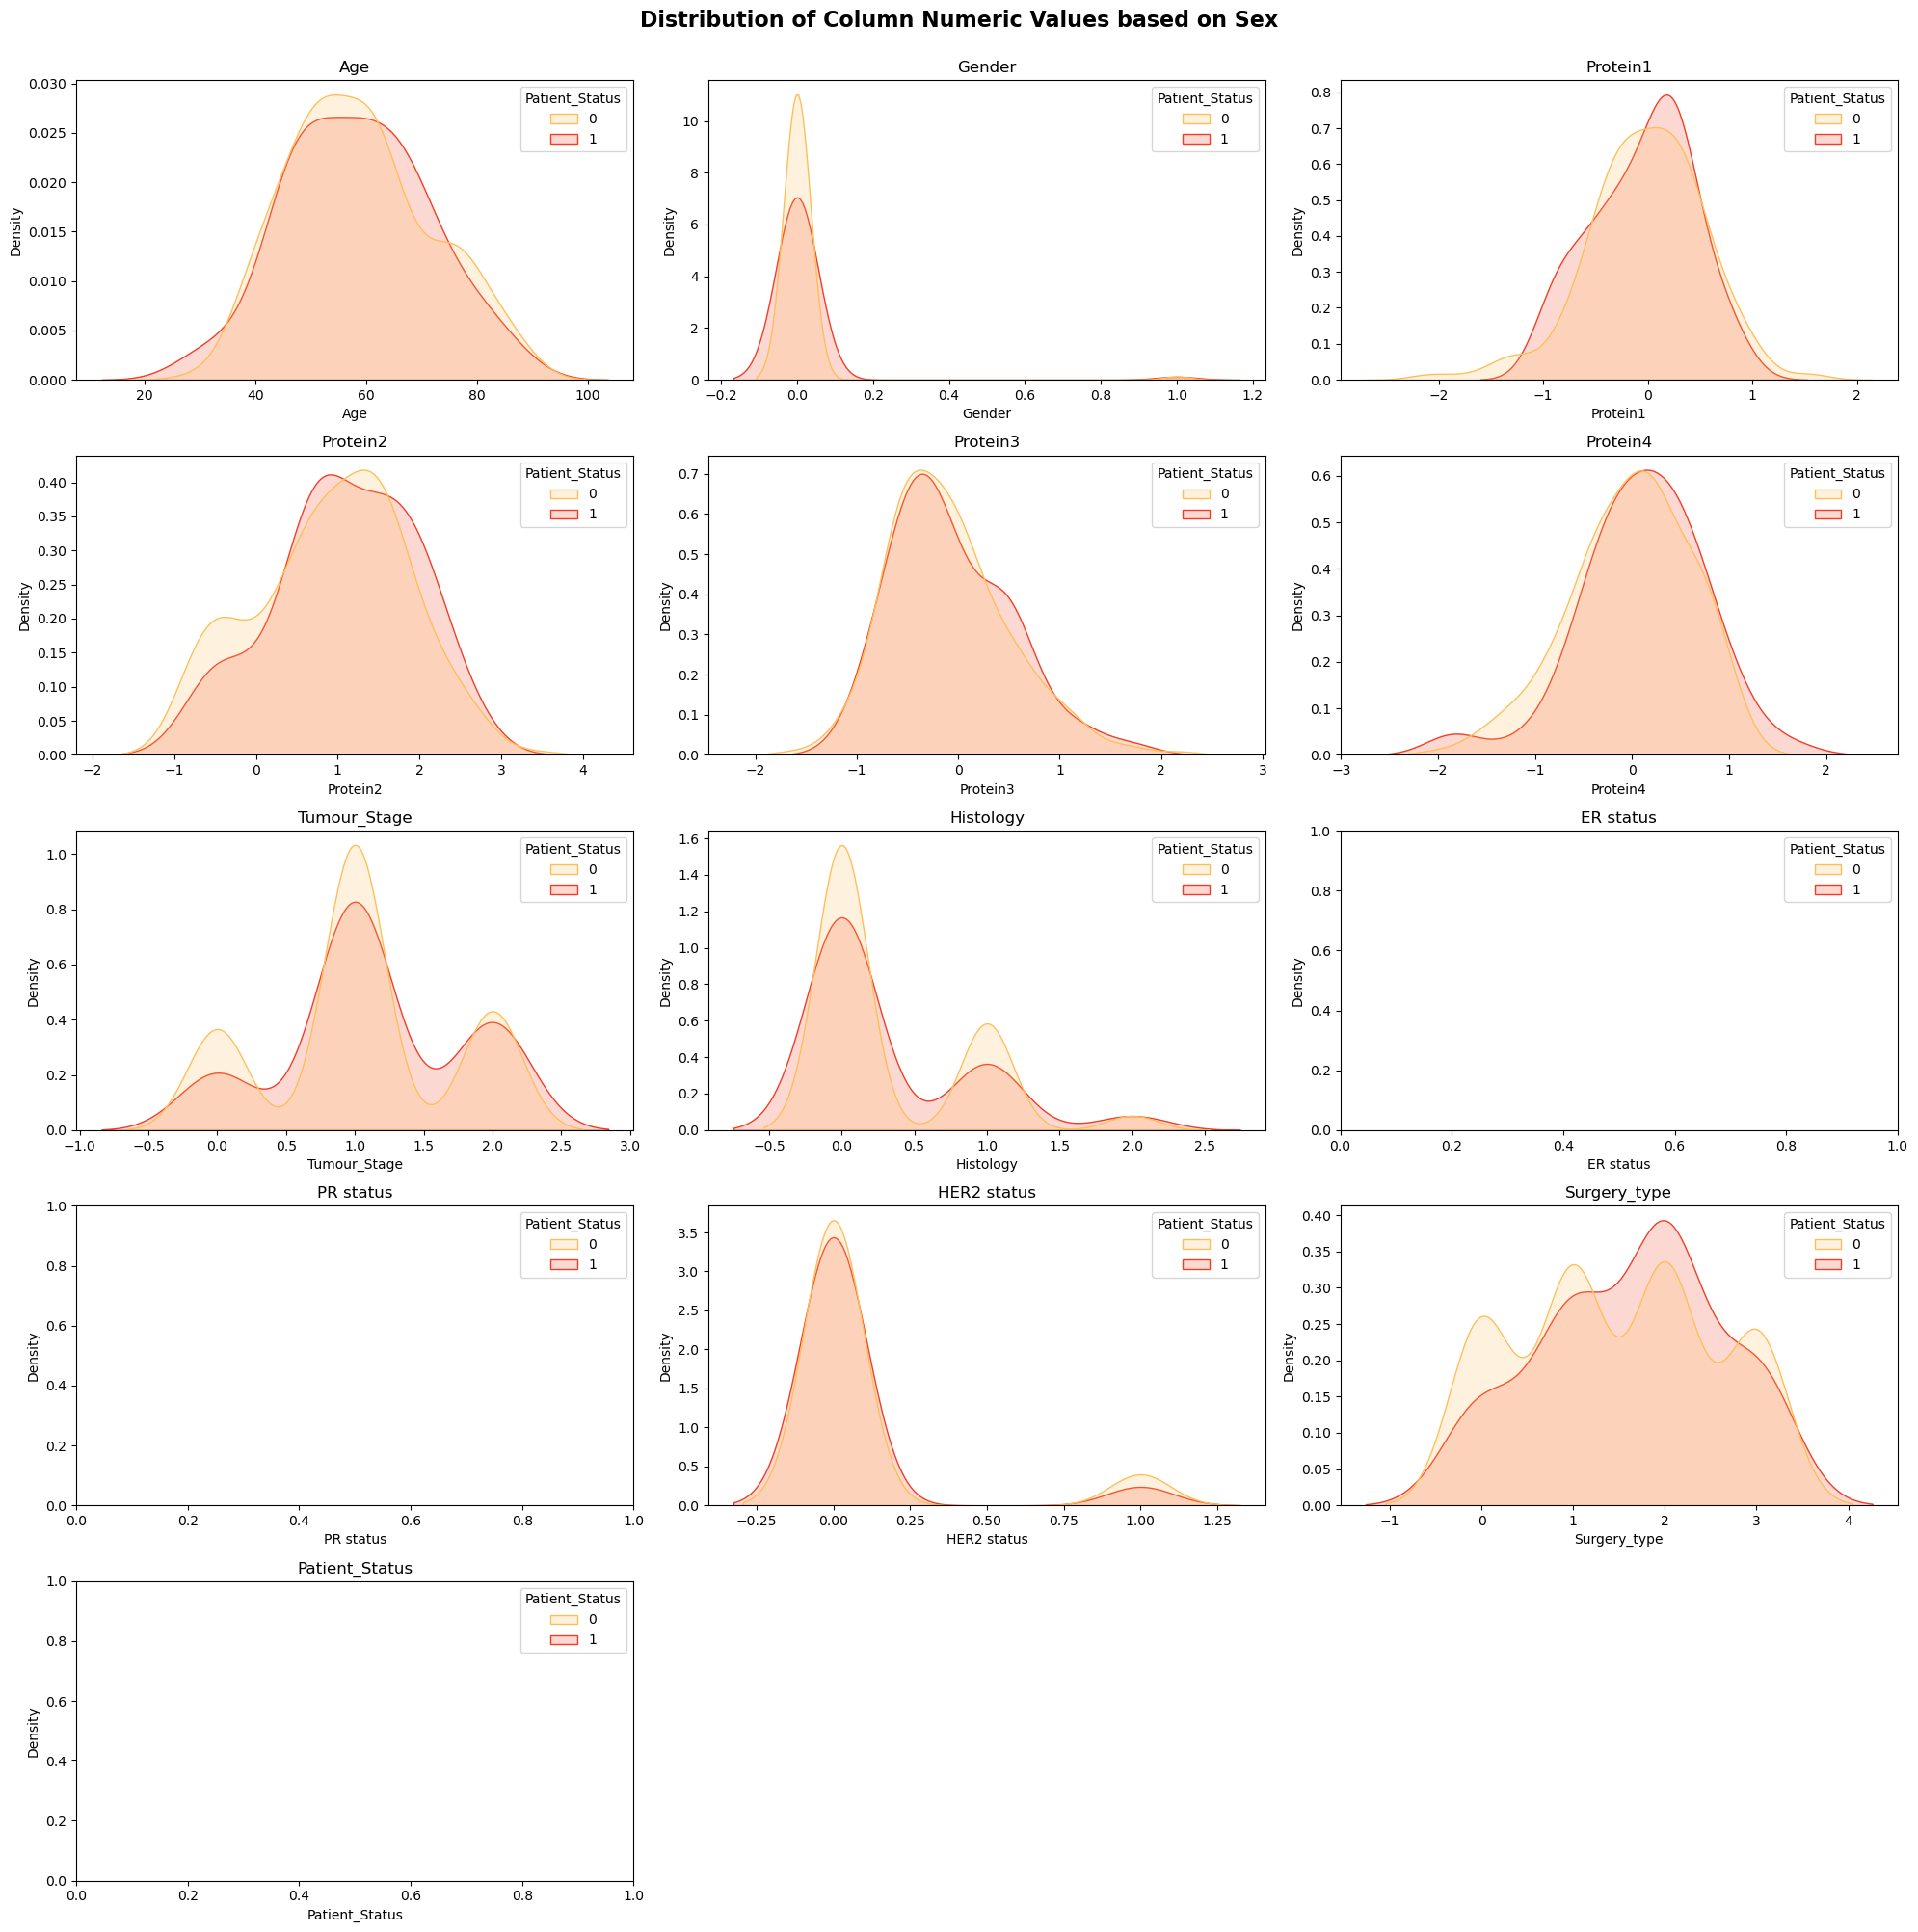

In [54]:
num_cols = 3
num_rows = math.ceil(len(numerical_columns) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.kdeplot(data=data, x=column, hue="Patient_Status", 
                fill=True, alpha=.2, palette="YlOrRd", 
                common_norm=False, ax=axes[row, col], warn_singular=False)\
        .set_title(column)

for i in range(len(numerical_columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

fig.suptitle('Distribution of Column Numeric Values based on Sex', y=1.0, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

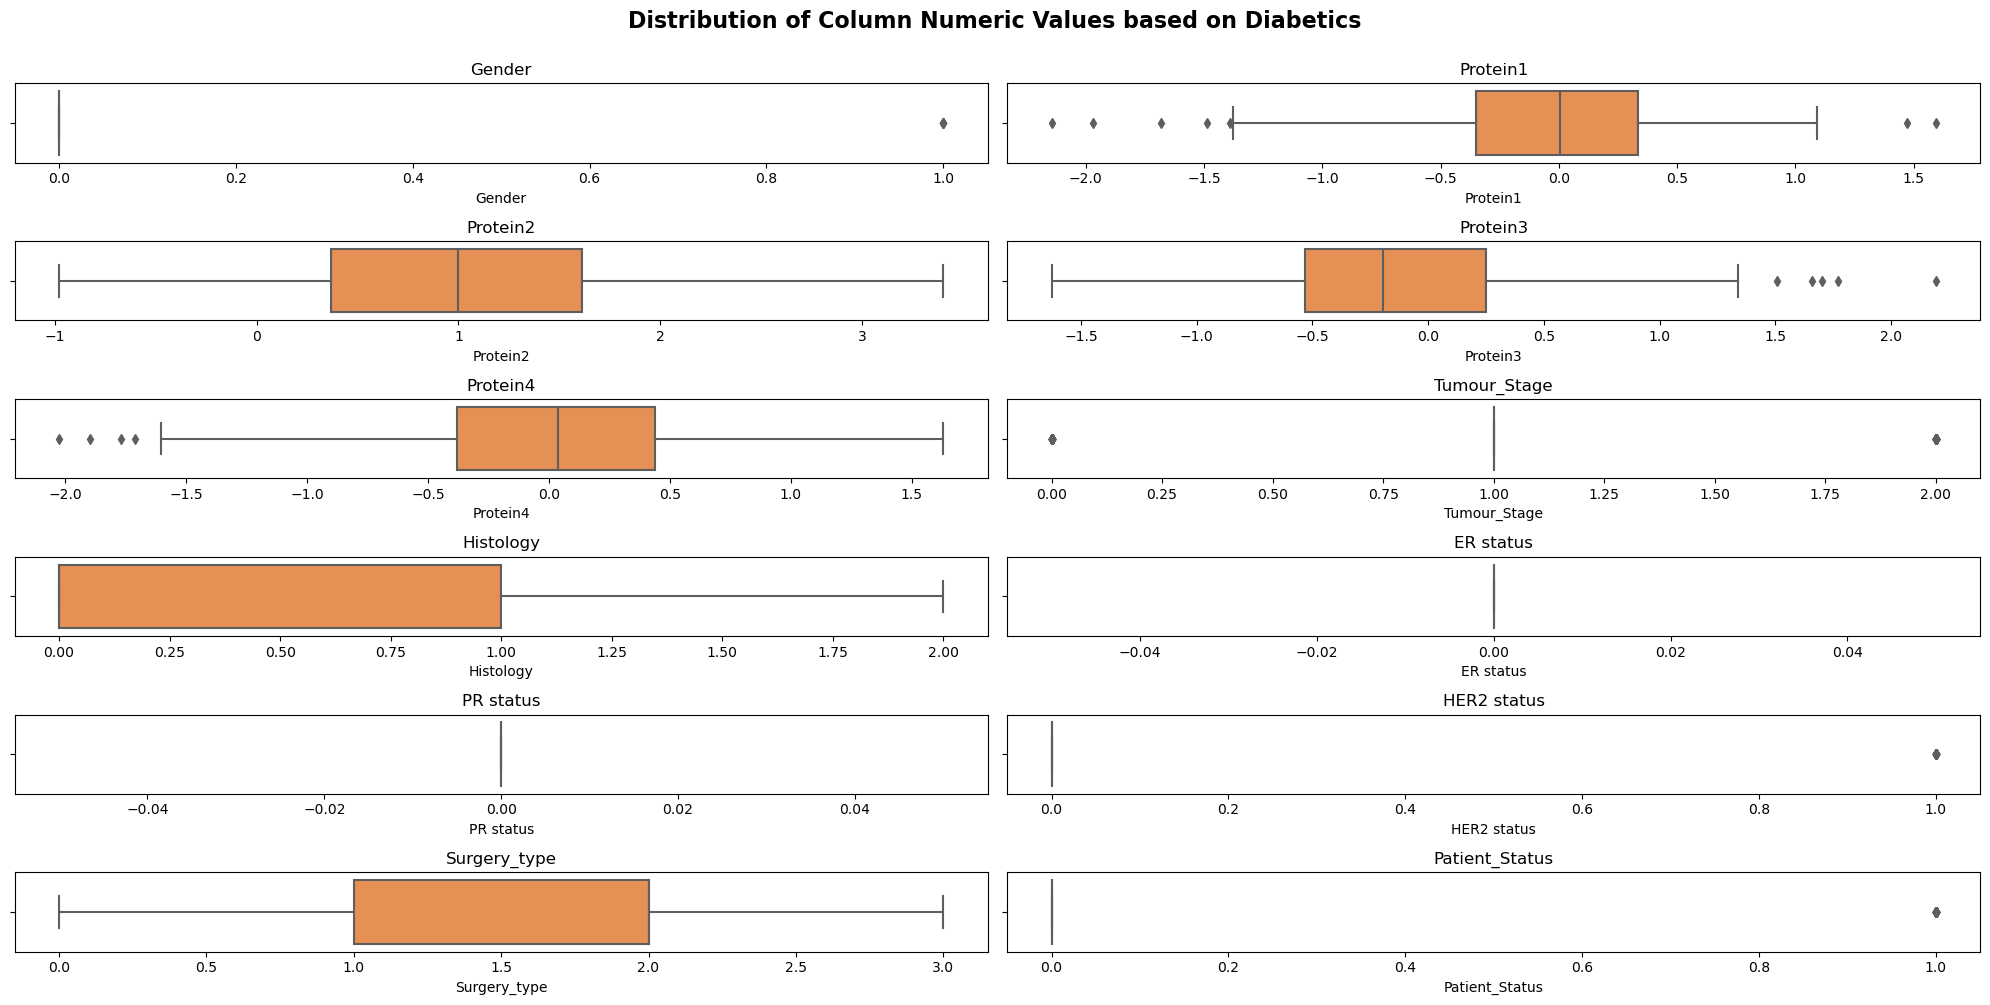

In [55]:
plot_columns = numerical_columns[1:]

num_cols = 2
num_rows = math.ceil(len(plot_columns) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
for i, column in enumerate(plot_columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=data[column], ax=axes[row, col], palette="Oranges").set_title(column)
    
for i in range(len(plot_columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

fig.suptitle('Distribution of Column Numeric Values based on Diabetics', y=1.0, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

[Text(0, 0, '255'), Text(0, 0, '62')]

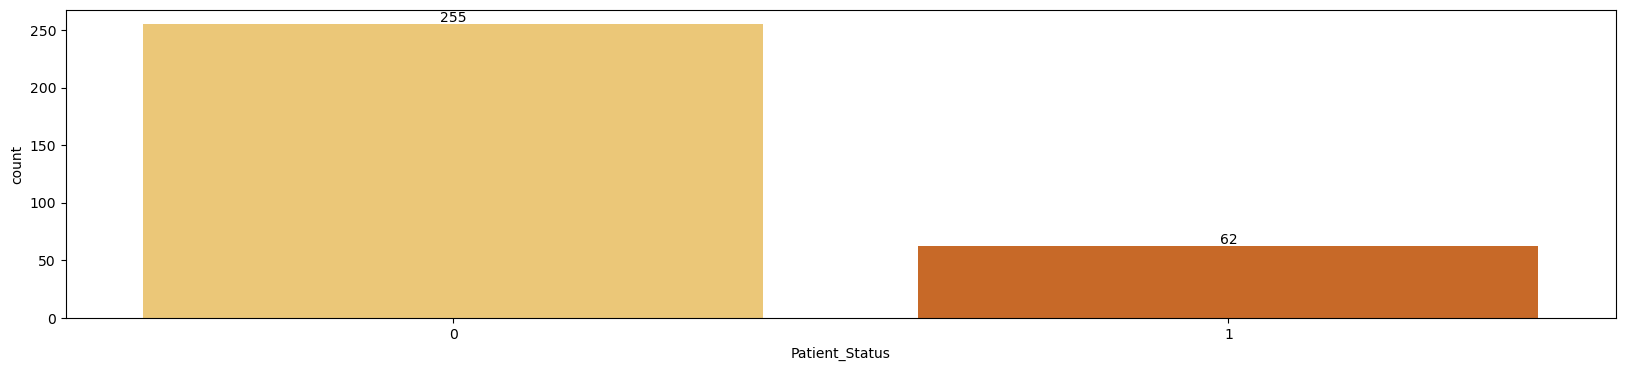

In [56]:
plt.subplots(figsize = (20,4))
ax = sns.countplot(data = data, x = 'Patient_Status', palette='YlOrBr')
ax.bar_label(ax.containers[0])

### 3.4. Columns Correlations

Text(0.5, 1.0, 'Correlation Matrix')

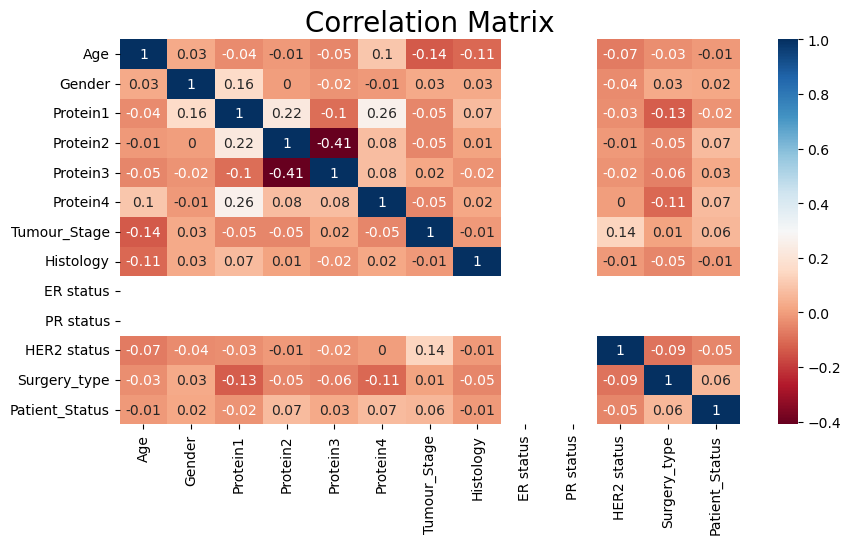

In [59]:
corr_data = data[numerical_columns].corr().round(2)

plt.figure(figsize=(10, 5))
sns.heatmap(corr_data, annot=True, cmap='RdBu')
plt.title("Correlation Matrix", size=20)

# 4. Classification Algoritms

In [36]:
X = features
Y = labels

# print(Counter(Y))
# undersample = SMOTE()
# X, Y = undersample.fit_resample(X, Y)
# print(Counter(Y))

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 42)

scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [23]:
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=100, n_jobs=-1, random_state=42)
gradient = GradientBoostingClassifier(max_depth=100, n_estimators=100, learning_rate=.01,  random_state=42)
randomForest = RandomForestClassifier(max_depth=100, random_state=42, n_jobs=-1)
histGradient = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)
knn = KNeighborsClassifier( n_jobs=-1)
decisionTree = DecisionTreeClassifier(random_state=42, max_depth=100)

model = StackingClassifier([
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradient', histGradient),
    ('XGB', XGB),
    # ('adaboost', adaboost),
    # ('bagging', bagging),
    # ('gradient', gradient),
    # ('knn', knn),
    # ('decisionTree', decisionTree),
], n_jobs=-1)

In [24]:
model.fit(X_train, y_train)

StackingClassifier(estimators=[('extraTress',
                                ExtraTreesClassifier(max_depth=100, n_jobs=-1,
                                                     random_state=42)),
                               ('randomforest',
                                RandomForestClassifier(max_depth=100, n_jobs=-1,
                                                       random_state=42)),
                               ('histGradient',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              c...
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=-1,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))],
                   n_jobs=-1)

In [25]:
print("Train Score        :",round((model.score(X_train, y_train)*100), 2),'%')
print("Test Score         :",round((model.score(X_test, y_test)*100), 2),'%')

y_pred = model.predict(X_test)

print("R Squared Error    :",round(r2_score(y_test, y_pred), 2))
print("Mean Squared Error :",round(mean_squared_error(y_test, y_pred), 2))

Train Score        : 100.0 %
Test Score         : 96.49 %
R Squared Error    : 0.85
Mean Squared Error : 0.04


In [26]:
train_predictions = model.predict(X_test).flatten()

train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_test})
train_results['Diff'] = abs(train_results['Actuals'] - train_results['Train Predictions'])
print(train_results.head(5))
print(train_results['Diff'].sum(), '/', len(train_results['Diff']))

   Train Predictions  Actuals  Diff
0                  1        1     0
1                  0        0     0
2                  0        0     0
3                  1        1     0
4                  1        1     0
4 / 114


In [27]:
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.99      0.96      0.97        73

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



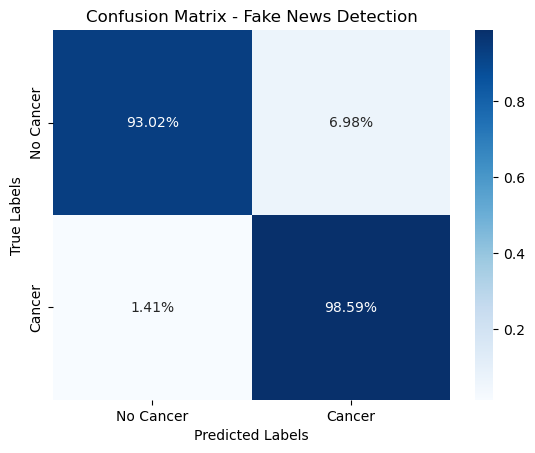

In [28]:
labels = ['No Cancer', 'Cancer']

y_pred = np.rint(model.predict(X_test))
# Build confusion matrix
con_mat = confusion_matrix(y_test,y_pred)

# Compute the percentages for the confusion matrix
cm_percent = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]

# Create the heatmap using Seaborn
sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues', xticklabels=labels, yticklabels=labels)
# sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues')

# Add labels to the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Fake News Detection')
plt.show()

# 5. Neural Network 

In [40]:
X = features
Y = labels

# print(Counter(Y))
# undersample = SMOTE()
# X, Y = undersample.fit_resample(X, Y)
# print(Counter(Y))

# X = X.values
Y = pd.get_dummies(Y).values

X_train, X_val, y_train, y_val = train_test_split(X, Y, train_size=0.9, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.78, random_state = 42)

scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
X_val = scalar.transform(X_val)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(399, 30)
(113, 30)
(57, 30)


In [41]:
def DNN_Model():
    model = Sequential()
    model.add(Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
    # model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    return model


def LSTM_Model():
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return model


def GRU_Model():
    model = Sequential()
    model.add(GRU(128, activation ='tanh', recurrent_activation ='sigmoid', recurrent_dropout = 0, unroll=False, use_bias=True, reset_after=True, return_sequences=True, input_shape = (X_train.shape[1],1)))
    model.add(GRU(64, activation ='tanh', recurrent_activation ='sigmoid', recurrent_dropout = 0, unroll=False, use_bias=True, reset_after=True))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return model
    

model = DNN_Model()
# model = LSTM_Model()
# model = GRU_Model()

model.summary()

opt = Adam(learning_rate = 0.000_1)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              31744     
                                                                 
 dense_7 (Dense)             (None, 128)               131200    
                                                                 
 dense_8 (Dense)             (None, 2)                 258       
                                                                 
Total params: 163,202
Trainable params: 163,202
Non-trainable params: 0
_________________________________________________________________


In [42]:
num_epoch = 10
batch_size = 32

history = model.fit(X_train, y_train, 
                    batch_size = batch_size, epochs = num_epoch, 
                    validation_data = (X_val, y_val))

Epoch 1/10
13/13 [==============================] - 1s 15ms/step - loss: 0.5475 - accuracy: 0.7068 - val_loss: 0.3899 - val_accuracy: 0.8947
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.3035 - accuracy: 0.9398 - val_loss: 0.2402 - val_accuracy: 0.9474
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 0.2138 - accuracy: 0.9549 - val_loss: 0.1723 - val_accuracy: 0.9649
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1700 - accuracy: 0.9599 - val_loss: 0.1390 - val_accuracy: 0.9649
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1430 - accuracy: 0.9649 - val_loss: 0.1193 - val_accuracy: 0.9649
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1236 - accuracy: 0.9699 - val_loss: 0.1061 - val_accuracy: 0.9825
Epoch 7/10
13/13 [==============================] - 0s 10ms/step - loss: 0.1095 - accuracy: 0.9749 - val_loss: 0.0975 - val_accuracy: 0.9825
Epoch 8/10
13/13 [

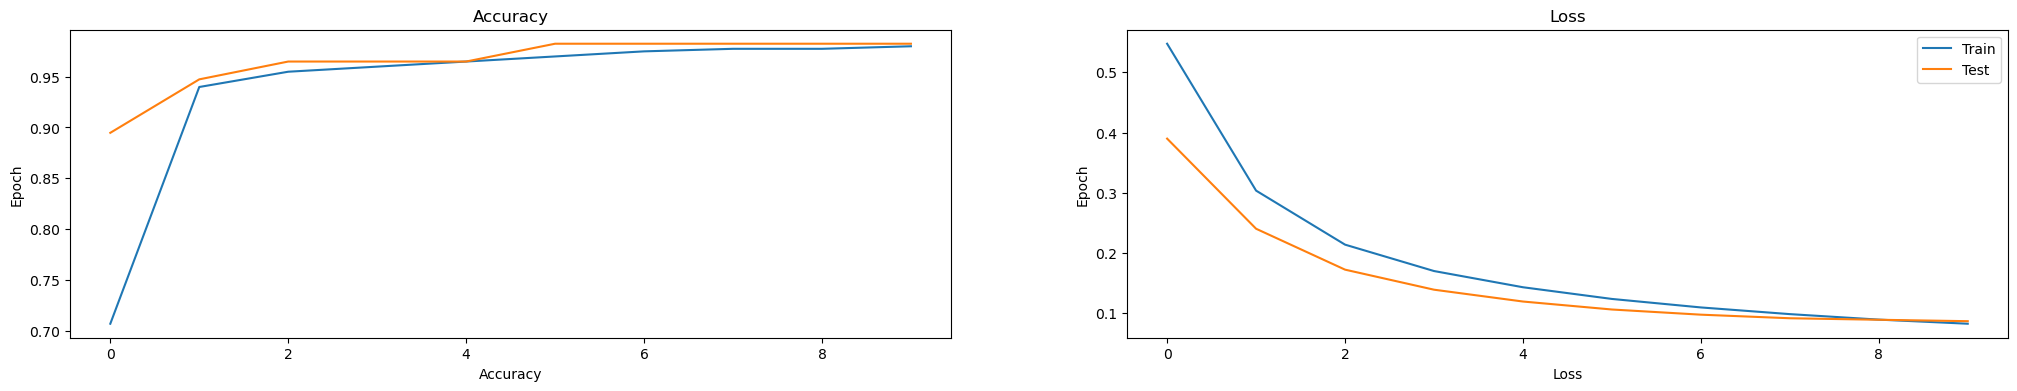

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(25, 4))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Accuracy')
ax[0].set_ylabel('Epoch')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Loss')
ax[1].set_xlabel('Loss')
ax[1].set_ylabel('Epoch')

plt.legend(['Train', 'Test'])
plt.show()

In [44]:
y_pred = np.rint(model.predict(X_test, verbose=0))

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        70

   micro avg       0.97      0.97      0.97       113
   macro avg       0.97      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113
 samples avg       0.97      0.97      0.97       113



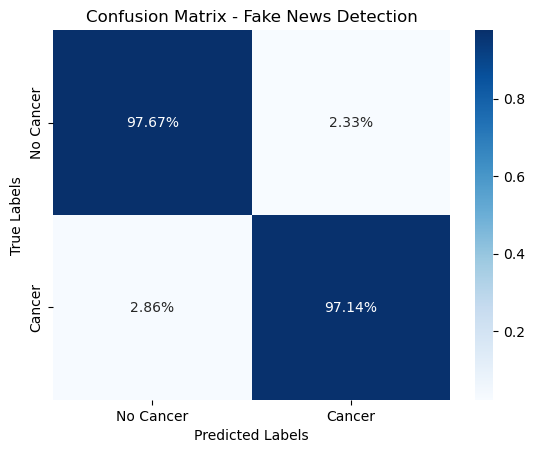

In [45]:
labels = ['No Cancer', 'Cancer']

y_pred = np.rint(model.predict(X_test, verbose=0))
con_mat = confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))

cm_percent = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Fake News Detection')
plt.show()